## Eigenvector & EigenValue $A\nu=\lambda\nu$

矩陣乘上一個向量可以對向量進行變換, 如底下是對向量進行角度的偏轉
![image.png](attachment:image.png)

其中這個矩陣對某些特定的向量，進行變換後, 剛好會發現只是造成原向量拉長或反方向而已.
這些某特定的向量,就是這個矩陣的Eigenvector, 而拉多長則是由EigenValue數值決定。


Note: numpy: The eigenvectors are normalized so their Euclidean norms
are 1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
C=np.array([[1,2],[2,1]])

In [5]:
#求共變異係數矩陣的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(C)
print("特徵向量.shape=",eigen_vecs.shape)
#print("特徵向量=",eigen_vecs)
print("特徵向量v1=",eigen_vecs[:,0])
print("特徵向量v2=",eigen_vecs[:,1])
print("特徵值=",eigen_vals.shape)
print("特徵值=",eigen_vals)

特徵向量.shape= (2, 2)
特徵向量v1= [0.70710678 0.70710678]
特徵向量v2= [-0.70710678  0.70710678]
特徵值= (2,)
特徵值= [ 3. -1.]


In [6]:
np.linalg.norm(eigen_vecs[:,0])

np.float64(0.9999999999999999)

In [7]:
np.linalg.norm(eigen_vecs[:,1])

np.float64(0.9999999999999999)

In [8]:
np.dot(C,eigen_vecs[:,0])

array([2.12132034, 2.12132034])

In [9]:
#assume C is convariance matrix

C=np.array([[.617,.615],[.615,.717]])
C

array([[0.617, 0.615],
       [0.615, 0.717]])

In [10]:
#求共變異係數矩陣的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(C)
print("Eigenvector.shape=",eigen_vecs.shape)
print("特徵向量v1=",eigen_vecs[:,0])
print("特徵向量v2=",eigen_vecs[:,1])
print("EigenValue.shape",eigen_vals.shape)
print("EigenValue=",eigen_vals)

Eigenvector.shape= (2, 2)
特徵向量v1= [-0.73519842  0.67785196]
特徵向量v2= [-0.67785196 -0.73519842]
EigenValue.shape (2,)
EigenValue= [0.04997083 1.28402917]


## PCA from Scratch

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Sample data
# Generate some sample data
np.random.seed(0)
x = np.random.rand(50)
y = 2 * x + 1 + np.random.rand(50)
X = np.column_stack((x, y))

# Step 1: Standardize the data (mean=0, variance=1)
X_meaned = X - np.mean(X, axis=0)
X_standardized = X_meaned / np.std(X_meaned, axis=0)

# Step 2: Compute the covariance matrix of the standardized data
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort the eigenvalues and eigenvectors in descending order of eigenvalues
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Step 5: Project the data onto the principal components
n_components = 1  # Number of principal components
eigenvector_subset = sorted_eigenvectors[:, :n_components]  #--> sorted_eigenvectors[:,0]
X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

# Output the reduced data
print("Reduced Data:")
print(X_reduced)


Reduced Data:
[[-0.13797023]
 [-0.39785483]
 [-0.54811103]
 [ 0.20140067]
 [ 0.38302331]
 [-0.05478235]
 [ 0.03934905]
 [-0.64141139]
 [-0.9445399 ]
 [ 0.44319174]
 [-0.36248187]
 [ 0.22942646]
 [-0.23967056]
 [-0.63176805]
 [ 1.13973407]
 [ 0.9838718 ]
 [ 0.80600945]
 [-0.40548536]
 [-0.81380725]
 [-0.48409728]
 [-1.33699508]
 [-0.59722874]
 [-0.24019092]
 [-0.65401376]
 [ 0.65579279]
 [ 0.04424159]
 [ 0.92535606]
 [-0.65950817]
 [ 0.11301882]
 [ 0.46584504]
 [ 0.64337376]
 [-0.50589682]
 [ 0.41642892]
 [-0.2660532 ]
 [ 0.98892211]
 [-0.06843243]
 [-0.23901433]
 [ 0.05428842]
 [-0.97981864]
 [-0.67404189]
 [ 0.44153534]
 [ 0.03041385]
 [-0.14366538]
 [ 0.79515168]
 [-0.18963778]
 [-0.12274458]
 [ 0.56841295]
 [ 1.14171687]
 [ 0.17415533]
 [ 0.65456177]]


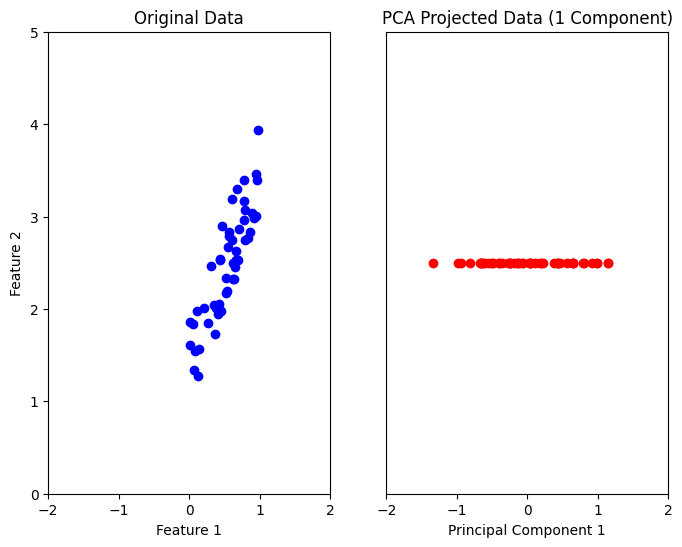

In [12]:

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
# Fix the x-axis and y-axis range
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(0, 5)
ax[1].set_xlim(-2, 2)

# Original Data
ax[0].scatter(X[:, 0], X[:, 1], color='blue')
ax[0].set_title('Original Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Projected Data
ax[1].scatter(X_reduced, np.zeros_like(X_reduced), color='red')
ax[1].set_title('PCA Projected Data (1 Component)')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_yticks([])  # Hide y-axis as data is 1-dimensional

plt.show()

In [13]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [-0.70710678, -0.70710678]])

In [14]:
sorted_eigenvectors

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

In [15]:
eigenvector_subset

array([[-0.70710678],
       [-0.70710678]])

In [16]:
eigenvector_subset = sorted_eigenvectors[:,1]
eigenvector_subset

array([ 0.70710678, -0.70710678])

In [17]:

# Step 5: Project the data onto the principal components
n_components = 1  # Number of principal components
eigenvector_subset = sorted_eigenvectors[:, 1]
X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

# Output the reduced data
print("Reduced Data:")
print(X_reduced)

Reduced Data:
[-0.12262829 -0.1472219  -0.45647245  0.21118429  0.22136411  0.0978523
 -0.10260675 -0.14105149 -0.34251252  0.22466237 -0.00361115  0.21659926
 -0.1971318  -0.0835743   0.47939666  0.34629367  0.07380501  0.01121935
 -0.47412498 -0.01451187 -0.71381732 -0.22784542 -0.34835812 -0.31097638
  0.06226052  0.18842901  0.36729066 -0.08434214  0.09022623  0.29146802
  0.25671433 -0.1717626   0.30072534 -0.22296377  0.25469733  0.0442385
 -0.13417782  0.16596728 -0.40595488 -0.47059994  0.18915872 -0.1123272
  0.08213655  0.1195258  -0.00748482  0.06488302  0.10514125  0.56324862
 -0.14055918  0.4081289 ]


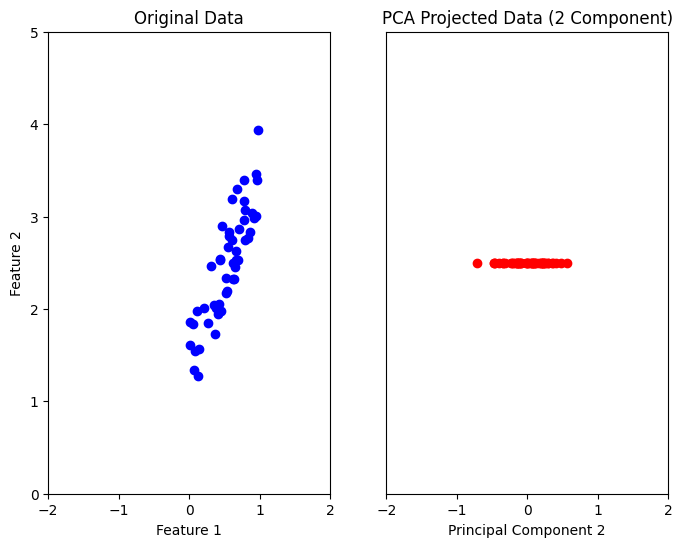

In [18]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
# Fix the x-axis and y-axis range
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(0, 5)
ax[1].set_xlim(-2, 2)


# Original Data
ax[0].scatter(X[:, 0], X[:, 1], color='blue')
ax[0].set_title('Original Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Projected Data
ax[1].scatter(X_reduced, np.zeros_like(X_reduced), color='red')
ax[1].set_title('PCA Projected Data (2 Component)')
ax[1].set_xlabel('Principal Component 2')
ax[1].set_yticks([])  # Hide y-axis as data is 1-dimensional

plt.show()

## example


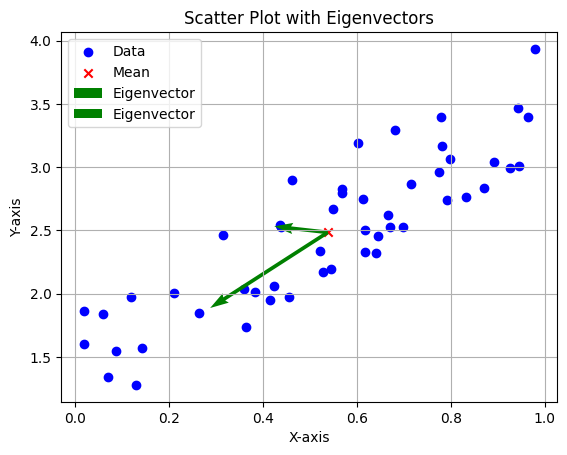

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
np.random.seed(0)
x = np.random.rand(50)
y = 2 * x + 1 + np.random.rand(50)

# Calculate the covariance matrix
data = np.vstack((x, y))
cov_matrix = np.cov(data)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Scatter plot
plt.scatter(x, y, label='Data', color='blue', marker='o')

# Plot the data center (mean)
mean_x = np.mean(x)
mean_y = np.mean(y)
plt.scatter(mean_x, mean_y, label='Mean', color='red', marker='x')

# Plot eigenvectors as straight lines
#We use plt.quiver to add the scaled eigenvectors as straight lines originating from the mean of the data.
for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    scaled_eigenvector = eigenvector * np.sqrt(eigenvalue)  # Scale eigenvector by eigenvalue
    plt.quiver(
        mean_x, mean_y, scaled_eigenvector[0], scaled_eigenvector[1],
        angles='xy', scale_units='xy', scale=1, color='green', label='Eigenvector'
    )

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Scatter Plot with Eigenvectors')
plt.show()
